In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [41]:
X,y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

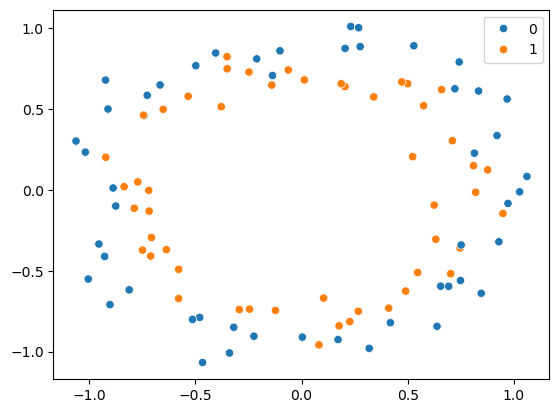

In [42]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [43]:
X_train, X_test ,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [44]:
import torch 
import torch.nn as nn
import torch.optim as optim

X_train_tensor = torch.from_numpy(X_train).float()  
y_train_tensor = torch.from_numpy(y_train).long()

X_test_tensor = torch.from_numpy(X_test).float()  # for class labels 
y_test_tensor = torch.from_numpy(y_test).long()

In [45]:
# wrapping in tensordata and dataloader class

from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [46]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.net(x)



In [47]:
import torch.optim as optim 

train_losses = []
test_losses = []

def train_model(model, train_loader, test_loader, epochs=3500, lr=0.01):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        model.train()
        running_train_loss = 0.0
        for input_feature_batch, input_label_batch in train_loader:
            optimizer.zero_grad()
            preds = model(input_feature_batch)
            loss = loss_fn(preds, input_label_batch)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
            
        avg_train_loss = running_train_loss/ len(train_loader)
        train_losses.append(avg_train_loss)    
        
        model.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for input_feature_batch,input_label_batch in test_loader:
                 preds = model(input_feature_batch)
                 loss = loss_fn(preds, input_label_batch)
                 running_test_loss += loss.item()
                 
        avg_test_loss = running_test_loss/ len(test_loader)
        test_losses.append(avg_test_loss)
        
        print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Test Loss = {avg_test_loss}:.4f")        
                

In [48]:
y.shape

(100,)

In [49]:
X.shape[0]

100

In [50]:
input_size = X.shape[1]
num_classes = len(np.unique(y))

In [51]:
model = NN(input_size, num_classes)
train_model(model, train_loader, test_loader, epochs = 3500,lr=0.01)

Epoch 1: Train Loss = 0.6981, Test Loss = 0.6906965374946594:.4f
Epoch 2: Train Loss = 0.6828, Test Loss = 0.7064290642738342:.4f
Epoch 3: Train Loss = 0.6808, Test Loss = 0.7193055152893066:.4f
Epoch 4: Train Loss = 0.6656, Test Loss = 0.7211390733718872:.4f
Epoch 5: Train Loss = 0.6661, Test Loss = 0.7231111526489258:.4f
Epoch 6: Train Loss = 0.6705, Test Loss = 0.7195166349411011:.4f
Epoch 7: Train Loss = 0.6564, Test Loss = 0.7140768766403198:.4f
Epoch 8: Train Loss = 0.6501, Test Loss = 0.7052623629570007:.4f
Epoch 9: Train Loss = 0.6407, Test Loss = 0.6944932341575623:.4f
Epoch 10: Train Loss = 0.6341, Test Loss = 0.6879469752311707:.4f
Epoch 11: Train Loss = 0.6300, Test Loss = 0.6898680329322815:.4f
Epoch 12: Train Loss = 0.6302, Test Loss = 0.6918803453445435:.4f
Epoch 13: Train Loss = 0.6210, Test Loss = 0.6876088976860046:.4f
Epoch 14: Train Loss = 0.6134, Test Loss = 0.6890446543693542:.4f
Epoch 15: Train Loss = 0.6052, Test Loss = 0.6866765022277832:.4f
Epoch 16: Train Los

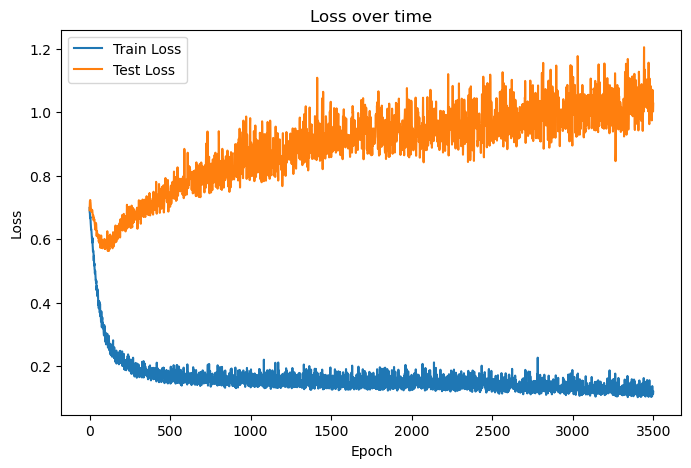

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.show()